In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-26 21:24:13.060869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 21:24:13.104945: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 21:24:13.105837: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-26 21:24:14.012108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Specify each path

In [2]:
base_path = '/home/yunusdanabas/catkin_ws/src/hand_steer_sim'

In [3]:
dataset = f'{base_path}/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint.csv'
model_save_path = f'{base_path}/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = f'{base_path}/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 6

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/38 [..............................] - ETA: 26s - loss: 1.8995 - accuracy: 0.1719
Epoch 1: saving model to /home/yunusdanabas/catkin_ws/src/hand_steer_sim/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5
38/38 [==============================] - 1s 11ms/step - loss: 1.7723 - accuracy: 0.2577 - val_loss: 1.6050 - val_accuracy: 0.3462
Epoch 2/1000
 1/38 [..............................] - ETA: 0s - loss: 1.6449 - accuracy: 0.2812
Epoch 2: saving model to /home/yunusdanabas/catkin_ws/src/hand_steer_sim/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.5639 - accuracy: 0.3580 - val_loss: 1.4084 - val_accuracy: 0.4142
Epoch 3/1000
38/38 [==============================] - ETA: 0s - loss: 1.4207 - accuracy: 0.4040

/home/yunusdanabas/mambaforge/envs/ros_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to /home/yunusdanabas/catkin_ws/src/hand_steer_sim/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5
38/38 [==============================] - 0s 3ms/step - loss: 1.4207 - accuracy: 0.4040 - val_loss: 1.2157 - val_accuracy: 0.5421
Epoch 4/1000
 1/38 [..............................] - ETA: 0s - loss: 1.2919 - accuracy: 0.4688
Epoch 4: saving model to /home/yunusdanabas/catkin_ws/src/hand_steer_sim/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5
38/38 [==============================] - 0s 2ms/step - loss: 1.2765 - accuracy: 0.4541 - val_loss: 1.0562 - val_accuracy: 0.6170
Epoch 5/1000
 1/38 [..............................] - ETA: 0s - loss: 1.2818 - accuracy: 0.4219
Epoch 5: saving model to /home/yunusdanabas/catkin_ws/src/hand_steer_sim/hand_steer_sim/model/static_mode/keypoint_classifier/keypoint_classifier.hdf5
38/38 [==============================] - 0s 3ms/step - loss: 1.1631 - accuracy: 0.5061 - val_los

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9738


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 73ms/step
[2.0314327e-03 1.4105622e-01 2.4950262e-13 2.9970701e-10 8.5691231e-01
 1.4813401e-08]
4


# Confusion matrix

51/51 [==============================] - 0s 814us/step


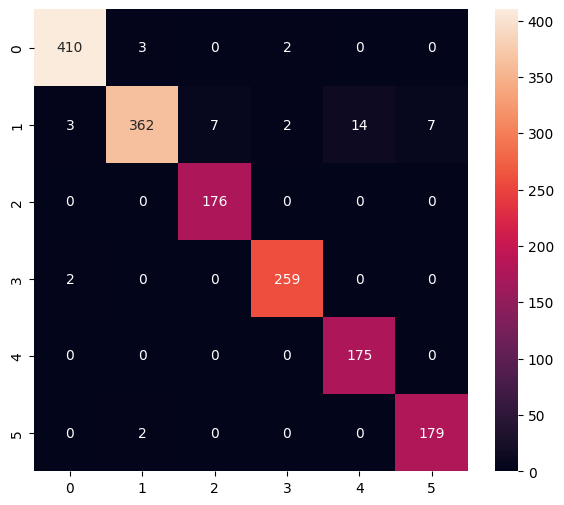

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       415
           1       0.99      0.92      0.95       395
           2       0.96      1.00      0.98       176
           3       0.98      0.99      0.99       261
           4       0.93      1.00      0.96       175
           5       0.96      0.99      0.98       181

    accuracy                           0.97      1603
   macro avg       0.97      0.98      0.97      1603
weighted avg       0.97      0.97      0.97      1603



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/yunusdanabas/mambaforge/envs/ros_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpvfv6tyjx/assets


INFO:tensorflow:Assets written to: /tmp/tmpvfv6tyjx/assets
2025-04-26 21:24:43.113293: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-04-26 21:24:43.113323: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-04-26 21:24:43.113668: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpvfv6tyjx
2025-04-26 21:24:43.114827: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-04-26 21:24:43.114844: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpvfv6tyjx
2025-04-26 21:24:43.118902: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-04-26 21:24:43.120047: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-04-26 21:24:43.162885: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6632

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 77 µs, sys: 7 µs, total: 84 µs
Wall time: 81.3 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0314311e-03 1.4105619e-01 2.4950268e-13 2.9970709e-10 8.5691243e-01
 1.4813401e-08]
4
